## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the carprice dataset

In [335]:

import sys
sys.executable
import pandas as pd 
import numpy as np 
import scipy.stats as scs
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits.axisartist

import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score 
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [336]:
#read dataset
cardata =pd.read_csv('C:\\Users\\hp\\Downloads\\CarPrice_Assignment.csv')
cardata

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [337]:
#describe the dataset
cardata.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [338]:
#know the dimenssion of dataset
cardata.shape

(205, 26)

In [339]:
#get info about missing values and datatype
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [340]:
#to know is there any null values present in dataset
NA_col = cardata.isnull().sum()
NA_col

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Step2 : Data Cleaning and Preperation


There is a variable named CarName which is comprised of two parts 
the first word is the name of 'car company' and the second is the 'car model'.
we need to consider only company name as the independent variable for model building.


In [341]:
CompanyName = cardata['CarName'].apply(lambda x : x.split(' ')[0])
cardata.insert(3,"CompanyName",CompanyName)
cardata.drop(['CarName'],axis=1,inplace=True)
cardata.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


check for spelling mistakes in column CompnanyName 

In [342]:
cardata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

There are some entries in the column CompanyName which consist of spelling mistake so we need to rectify it
such as-
- maxda = mazda
- Nissan = nissan
- porsche = porcshce
- toyota = toyouta
- vokswagen = volkswagen =  vw

In [343]:
#define function to correct the car name
cardata.CompanyName = cardata.CompanyName.str.lower()

def correct_name(old,new):
    cardata.CompanyName.replace(old,new,inplace=True)

correct_name('maxda','mazda')
correct_name('porcshce','porsche')
correct_name('toyouta','toyota')
correct_name('vokswagen','volkswagen')
correct_name('vw','volkswagen')

cardata.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [344]:
#get the name of columns
cardata.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## Step 3: Visualizing the Data

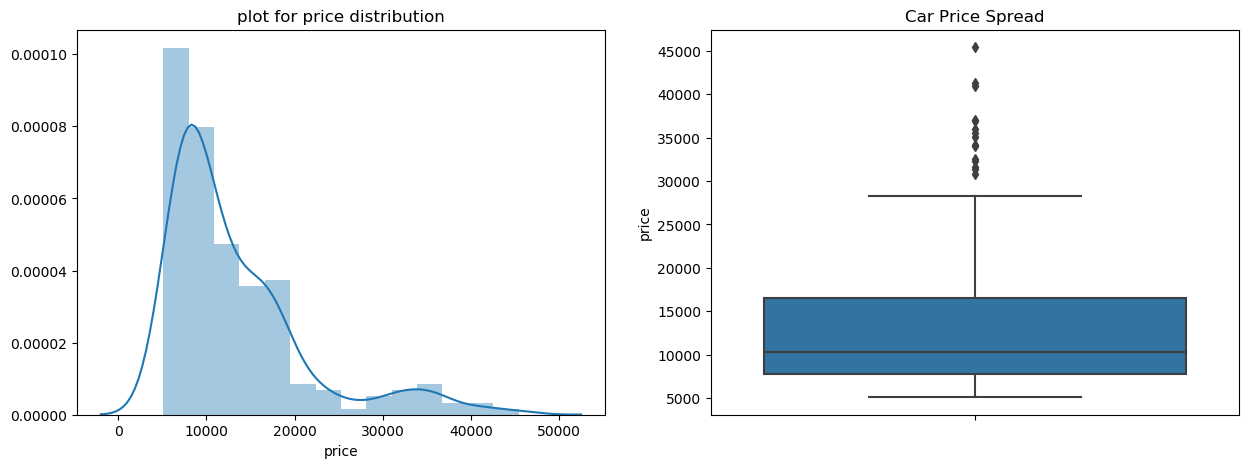

In [345]:
#plot for price
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('plot for price distribution')
sns.distplot(cardata.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cardata.price)

plt.show()

In [346]:
#quartile distribution of price column
cardata.price.describe(percentiles = [0.25,0.40,0.55,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
40%       9036.600000
50%      10295.000000
55.0%    11250.200000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

- from the percentile distribution and histogram plot for  price it it seen that price distribution is right skewed 
- meaning that the most prices in the dataset are low(Below 15,000).
- mean value of price lies at 13276 and the maximum values is 45400 
- 50% of the car prices are below 10295
- there is a significant difference between mean, median,min and max values
- In box plot the spread of data points is far from mean shows there is a high variance in the price data 

### Catagorical Data Visualization

- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

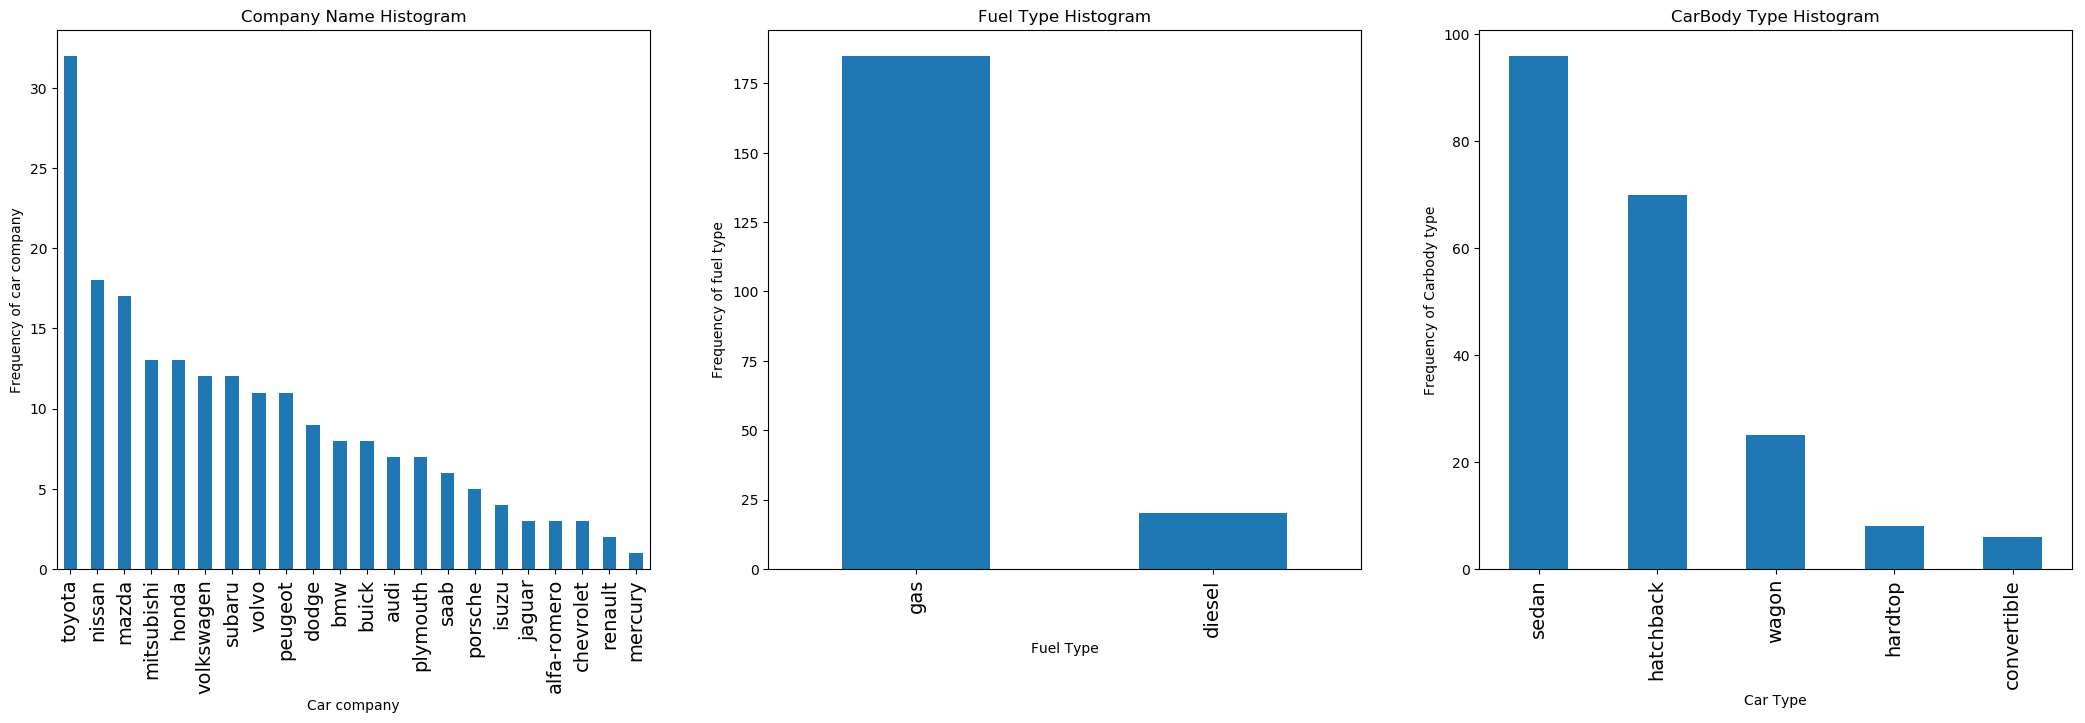

In [347]:
#plotting the graph for fuel type, carcompany,carbody type 
plt.figure(figsize=(26, 7))

plt.subplot(1,3,1)
plt1 = cardata.CompanyName.value_counts().plot('bar')
plt.title('Company Name Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of car company')
plt.xticks(fontsize=14,rotation=90)

plt.subplot(1,3,2)
plt1 = cardata.fueltype.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.xticks(fontsize=14,rotation=90)
plt.subplot(1,3,3)
plt1 = cardata.carbody.value_counts().plot('bar')
plt.title('CarBody Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Carbody type')
plt.xticks(fontsize=14,rotation=90)
plt.show()

- Toyota is a most popular car among buyers. while mercury is not demanding one.
- Car with gas fuel is prefered over diesel cars
- sedan is a most favored car type. hardtop and convertible cars are not popular among buyers.

<Figure size 2500x600 with 0 Axes>

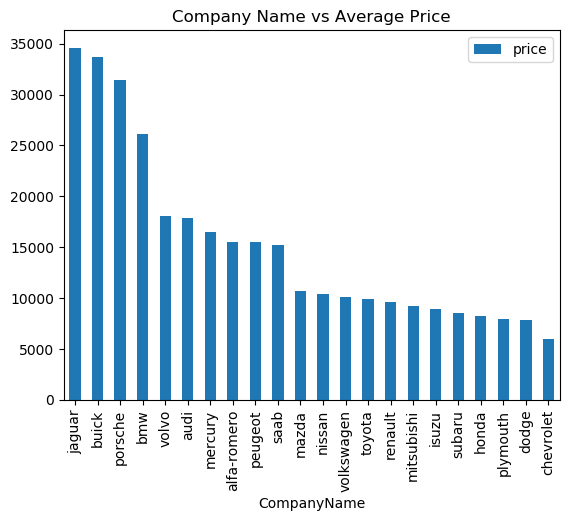

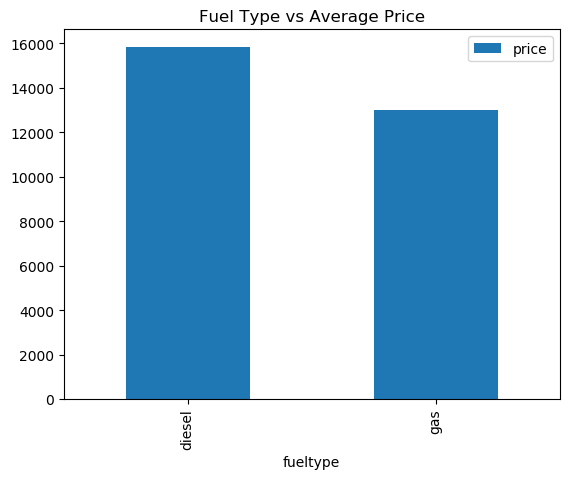

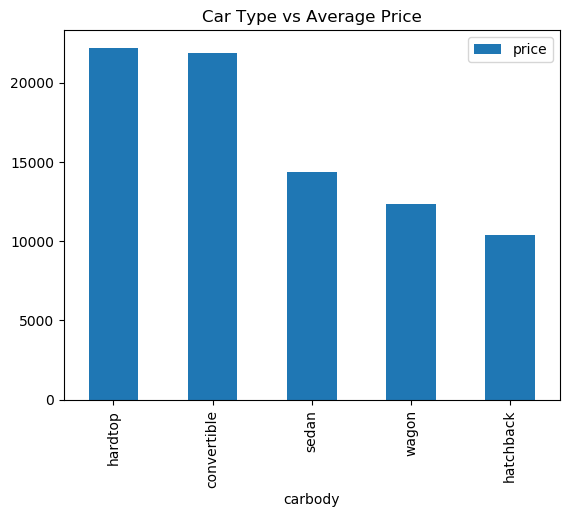

In [348]:
#plotting price verses company name,fueltype and car type
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cardata.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cardata.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cardata.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

- now analysing categories with respect to price it is shown that 
- Jaguar ,Buick and porsche seem to have highest average price.
- diesel fueled vehicals  has higher average price than gas fuel.
- hardtop and convertible have higher average price while hatch back has lower price range.

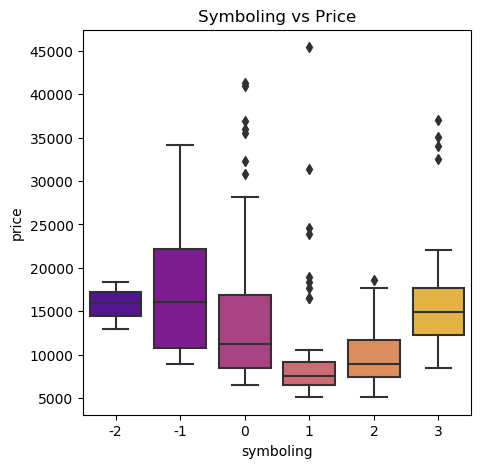

In [349]:
#plotting the sefety feature symbolling vs price
plt.figure(figsize=(5,5))

plt.title('Symboling vs Price')
sns.boxplot(x=cardata.symboling, y=cardata.price, palette=("plasma"))

plt.show()

- here we can see that the spread of symboling for value 0, 1 is far than others
- The cars with -1 symboling seems to be high priced as it makes sense too, insurance risk rating -1 is quite good.
- But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

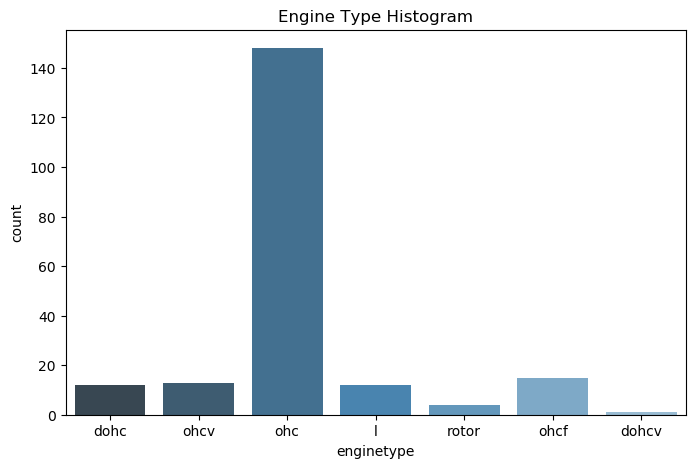

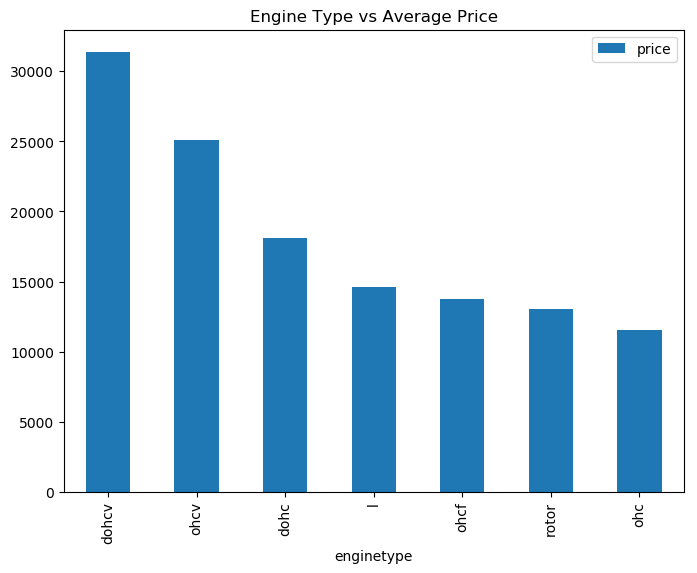

In [350]:
#plot for engine type
plt.figure(figsize=(8,5))

plt.title('Engine Type Histogram')
sns.countplot(cardata.enginetype, palette=("Blues_d"))



df = pd.DataFrame(cardata.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))

df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')

plt.show()

- ohc engines are more popular type
- dohcv engines are have high price while ohc and rotor engines have lower price values

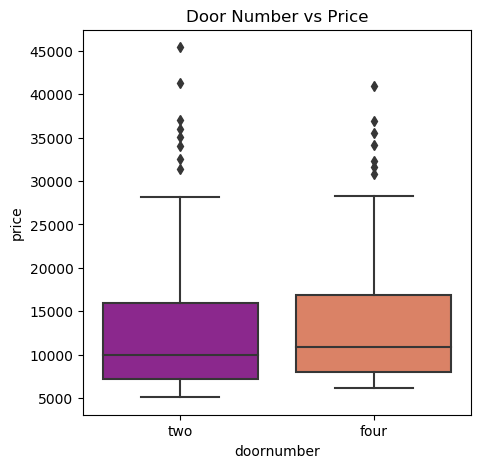

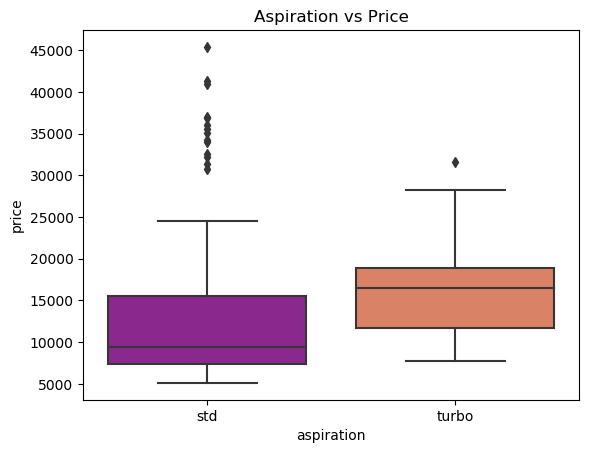

In [351]:
#plot for door number and aspiration
plt.figure(figsize=(5,5))

plt.title('Door Number vs Price')
sns.boxplot(x=cardata.doornumber, y=cardata.price, palette=("plasma"))

plt.show()

plt.title('Aspiration vs Price')
sns.boxplot(x=cardata.aspiration, y=cardata.price, palette=("plasma"))

plt.show()

- there is no noticable difference in price of cars with two and four  nnumber of door
- turbo have high price range than std

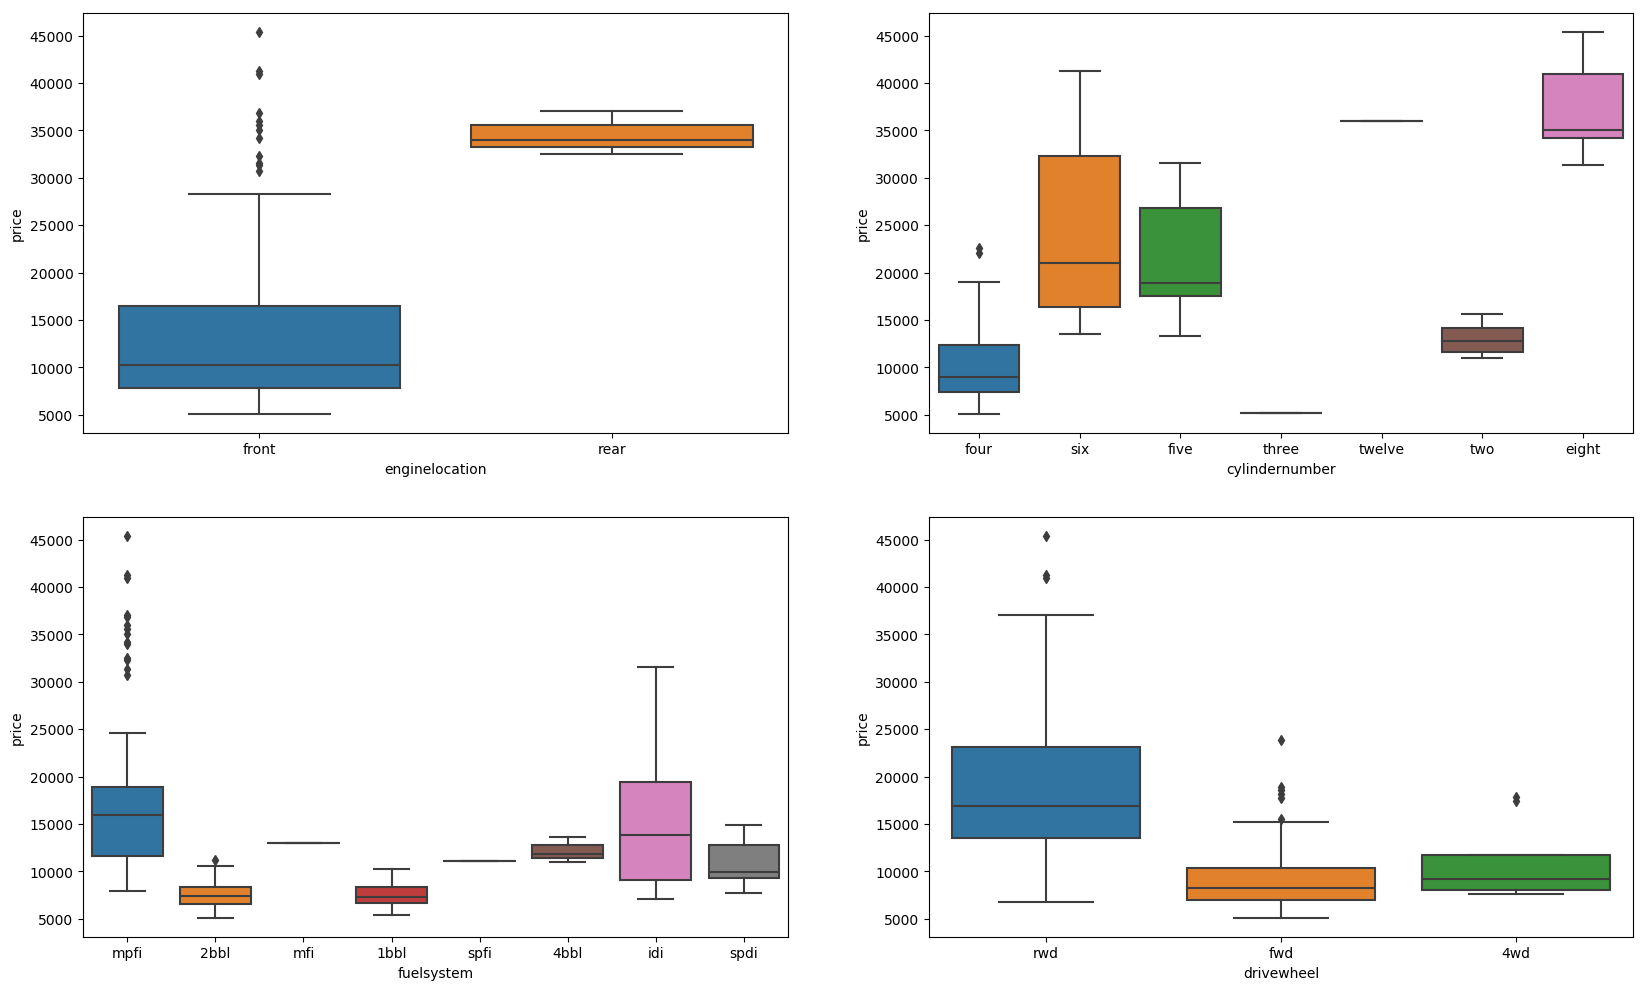

In [352]:
#plot for enginelocation,cylindernumber , drive wheel and fuelsystem

plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = cardata)
plt.subplot(2,2,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cardata)
plt.subplot(2,2,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cardata)
plt.subplot(2,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cardata)

plt.show()

- rear engine location have high price range. but data poits are not much to draw any inference
- eight cylinders have the highest price range.
- mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful          inference
- A very significant difference in drivewheel category.rwd drivewheel is prefred in high range cars.

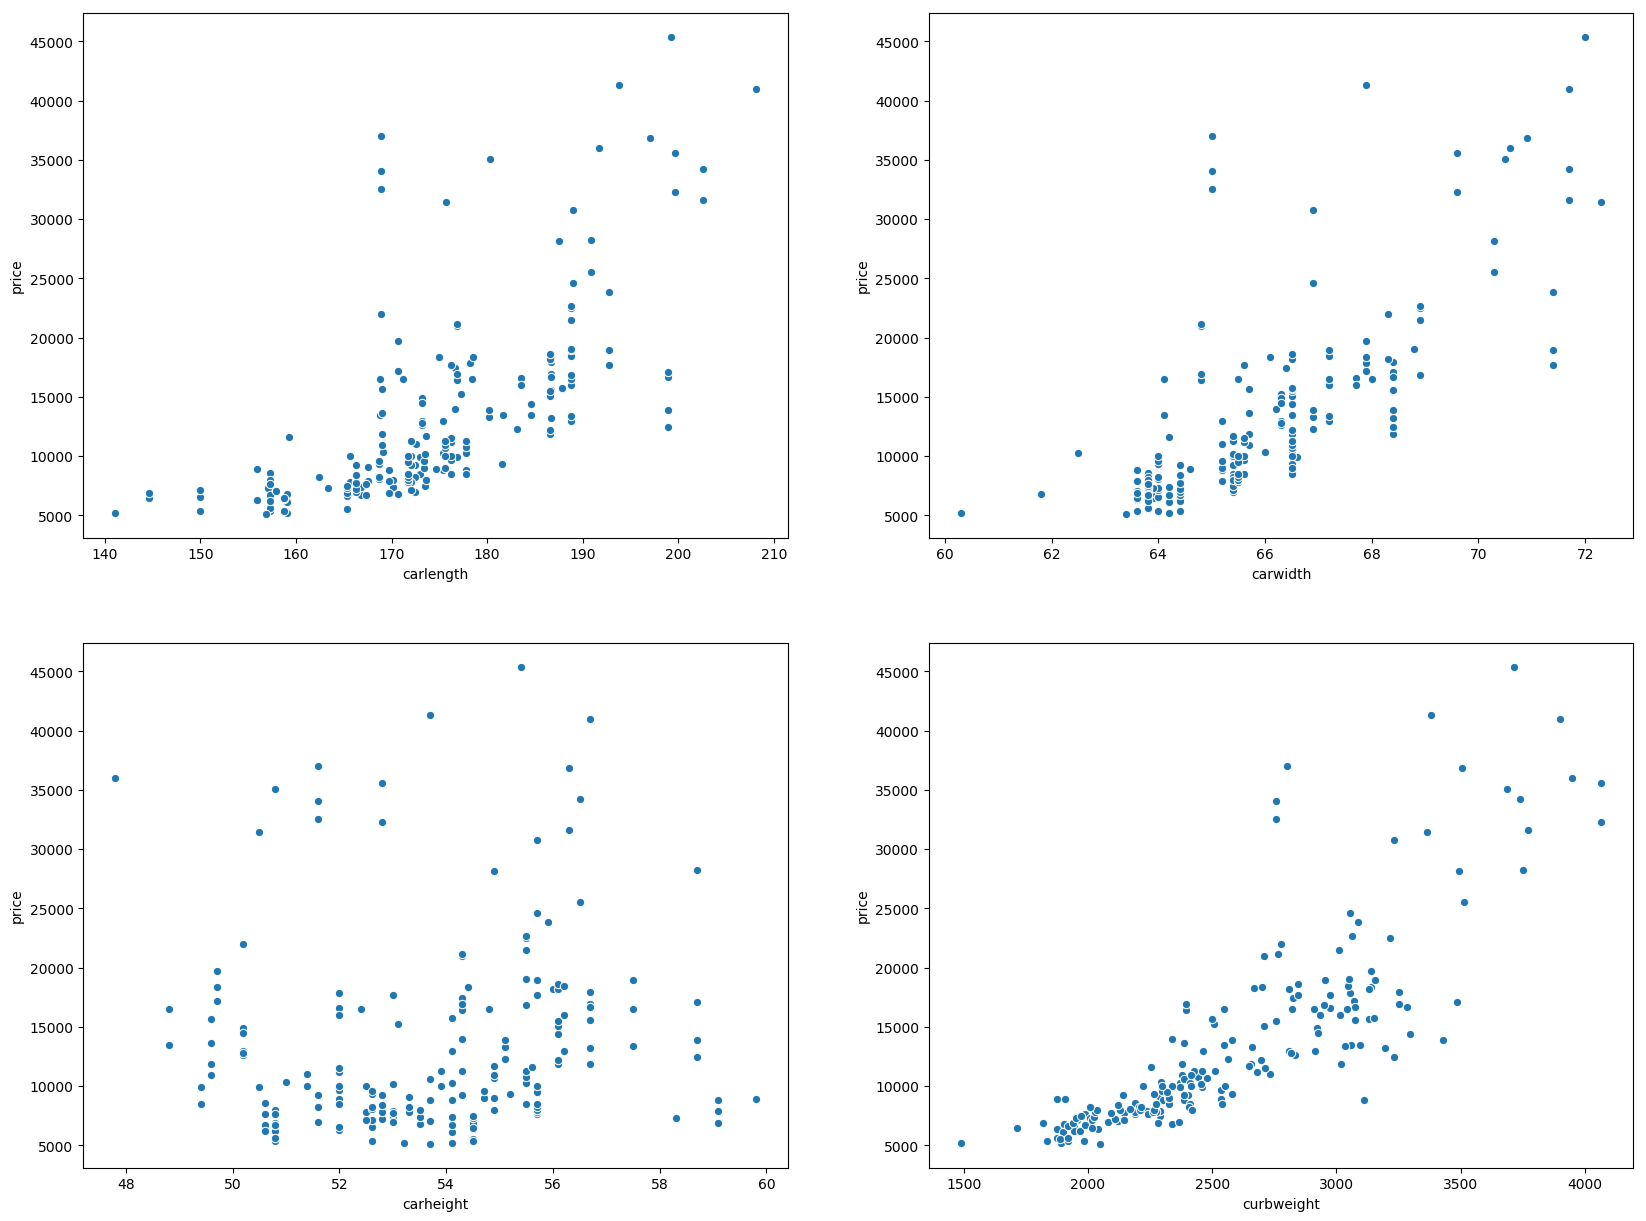

In [353]:
### visualising numerical data
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.scatterplot(x = 'carlength', y = 'price', data = cardata)
plt.subplot(2,2,2)
sns.scatterplot(x = 'carwidth', y = 'price', data = cardata)
plt.subplot(2,2,3)
sns.scatterplot(x = 'carheight', y = 'price', data = cardata)
plt.subplot(2,2,4)
sns.scatterplot(x = 'curbweight', y = 'price', data = cardata)

- here carlegth,carwidth and curbweight shows positive correlation with price of car but car height does not show any trend in data

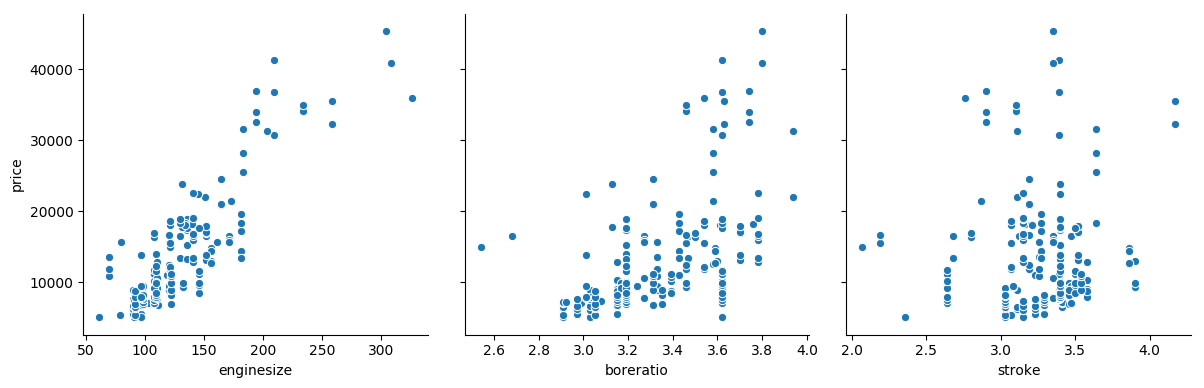

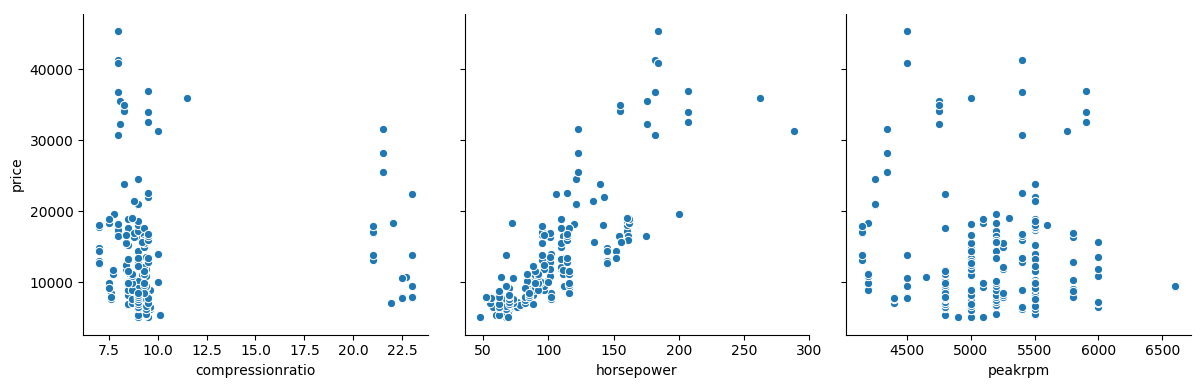

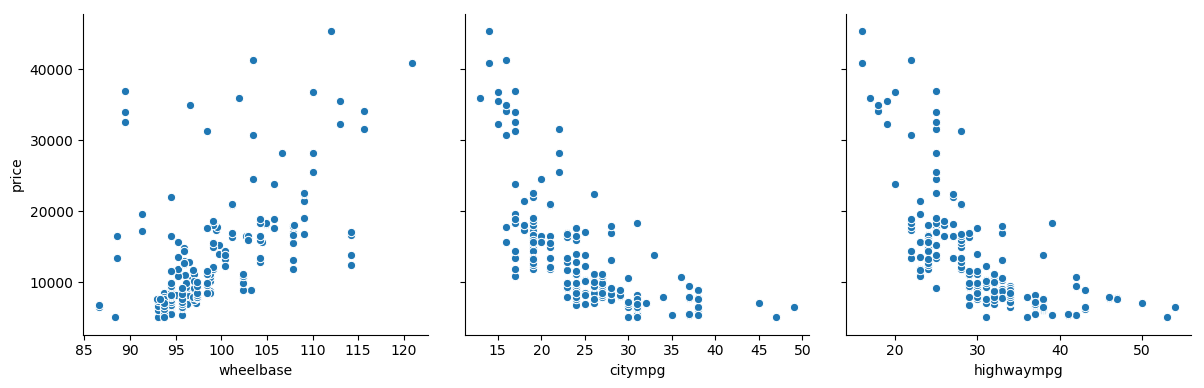

In [354]:
#pairplot for numerical variables
def drawpair(var1,var2,var3):
    sns.pairplot(cardata,x_vars=[var1,var2,var3],y_vars='price',height=4,aspect=1,kind='scatter')
    plt.show()

drawpair('enginesize', 'boreratio', 'stroke')
drawpair('compressionratio', 'horsepower', 'peakrpm')
drawpair('wheelbase', 'citympg', 'highwaympg')    
    
    


- enginesize, boreratio, horsepower, wheelbase -shows significant positive correlation with price.
- citympg, highwaympg - tends to have  negative correlation with price.

In [355]:
# find correlation coefficient of carlength with  carwidth
np.corrcoef(cardata['carlength'], cardata['carwidth'])[0, 1]

0.841118268481846

In [356]:
# deriving features
#Binning the Car Companies based on avg prices of each Company.
cardata['price'] = cardata['price'].astype('int')
temp = cardata.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['lowprice','Medium','Highprice']
cardata['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cardata.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium


<Figure size 2500x600 with 0 Axes>

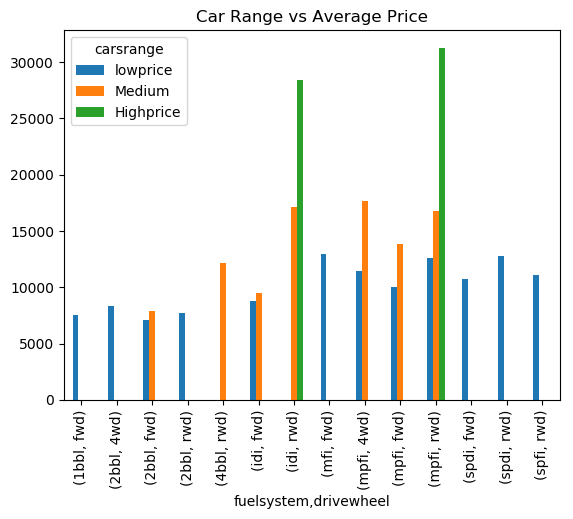

In [357]:
#group fuelsystem, drivewheel and carrange over price and plot it
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cardata.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

In [358]:
#variable selected for regression
car_model = cardata[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype',
                     'cylindernumber', 'enginesize', 'boreratio','horsepower','carlength','carwidth', 'carsrange']]
car_model.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4,Medium


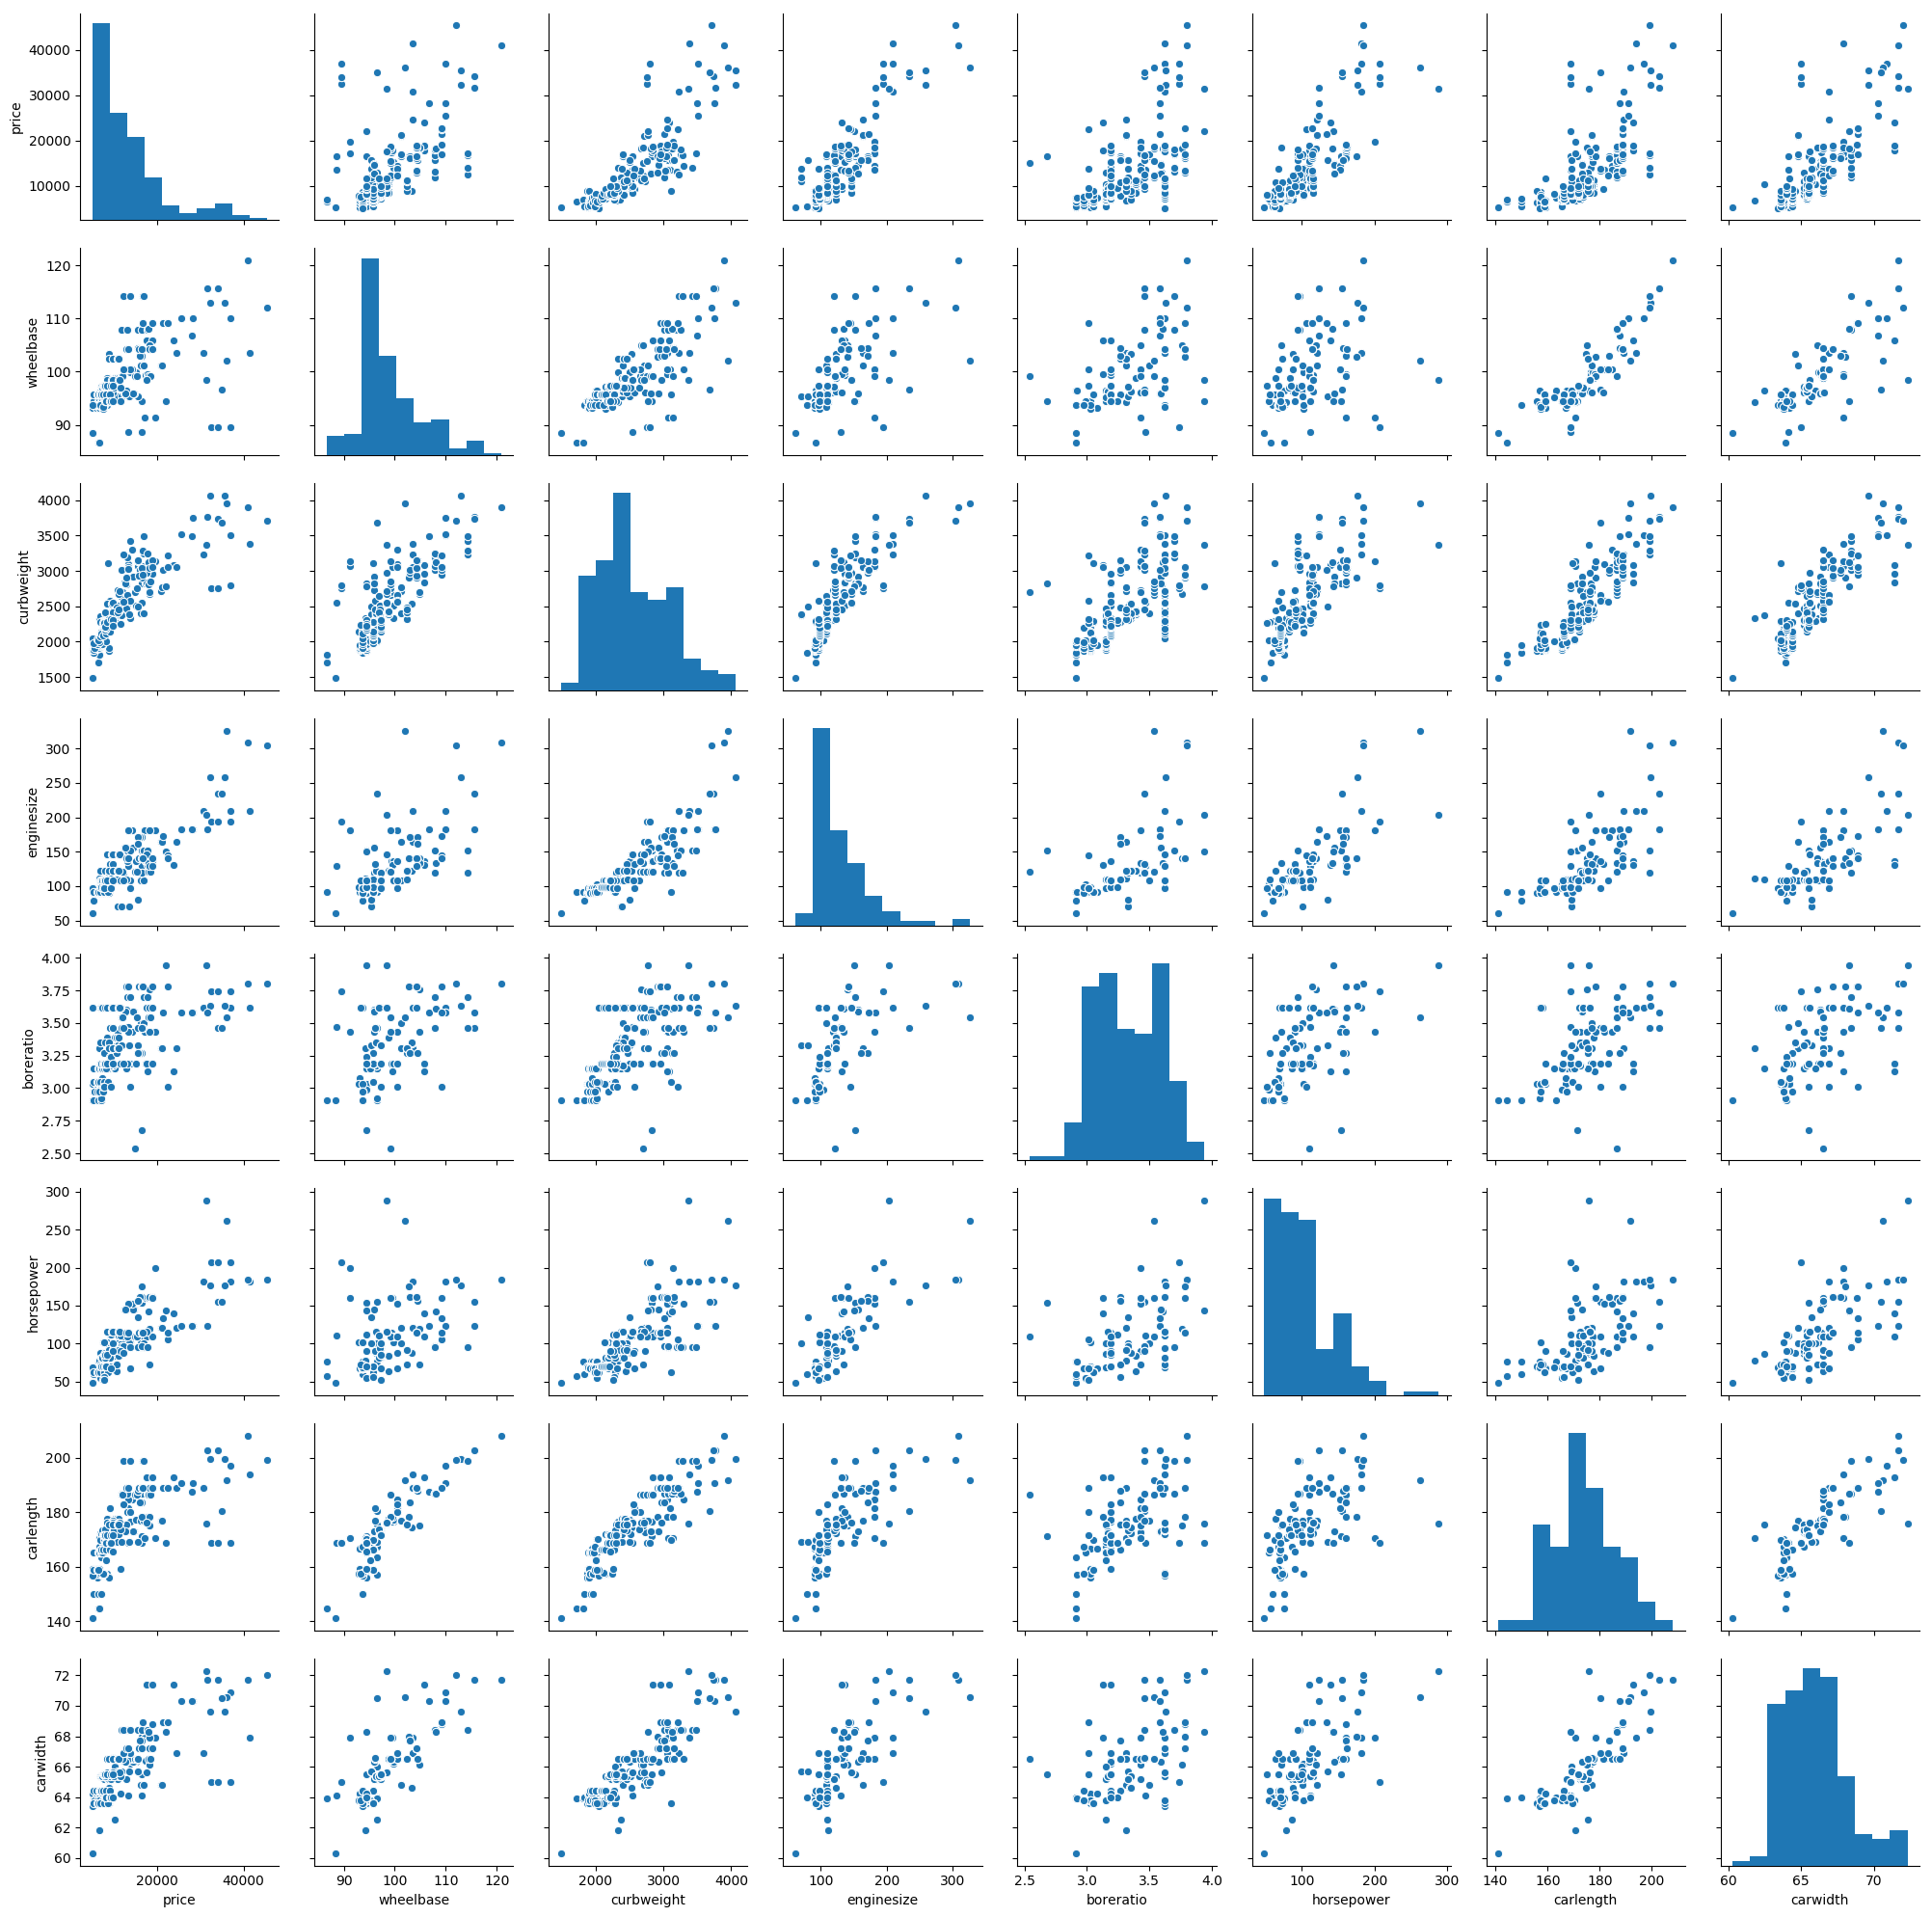

In [359]:
sns.pairplot(car_model)
plt.show()

In [360]:
#define function to create dummy variables--
def createdummies(x,cardf):
    dmtemp = pd.get_dummies(cardf[x], drop_first = True)
    cardf = pd.concat([cardf, dmtemp], axis = 1)
    cardf.drop([x], axis = 1, inplace = True)
    return cardf

In [361]:
#creating dummies
car_model = createdummies('fueltype',car_model)
car_model = createdummies('aspiration',car_model)
car_model = createdummies('carbody',car_model)
car_model = createdummies('drivewheel',car_model)
car_model = createdummies('enginetype',car_model)
car_model = createdummies('cylindernumber',car_model)
car_model = createdummies('carsrange',car_model)

In [362]:
car_model.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highprice
0,13495,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,0,0,1,0,0,0,0,0,1,0


## Splitting the Data into Training and Testing Sets

In [363]:

df_train, df_test = train_test_split(car_model, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

*We will use MinMax scaling.*


In [364]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highprice
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,0,0,0,1,0,0,0,0,1,0


In [365]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highprice
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


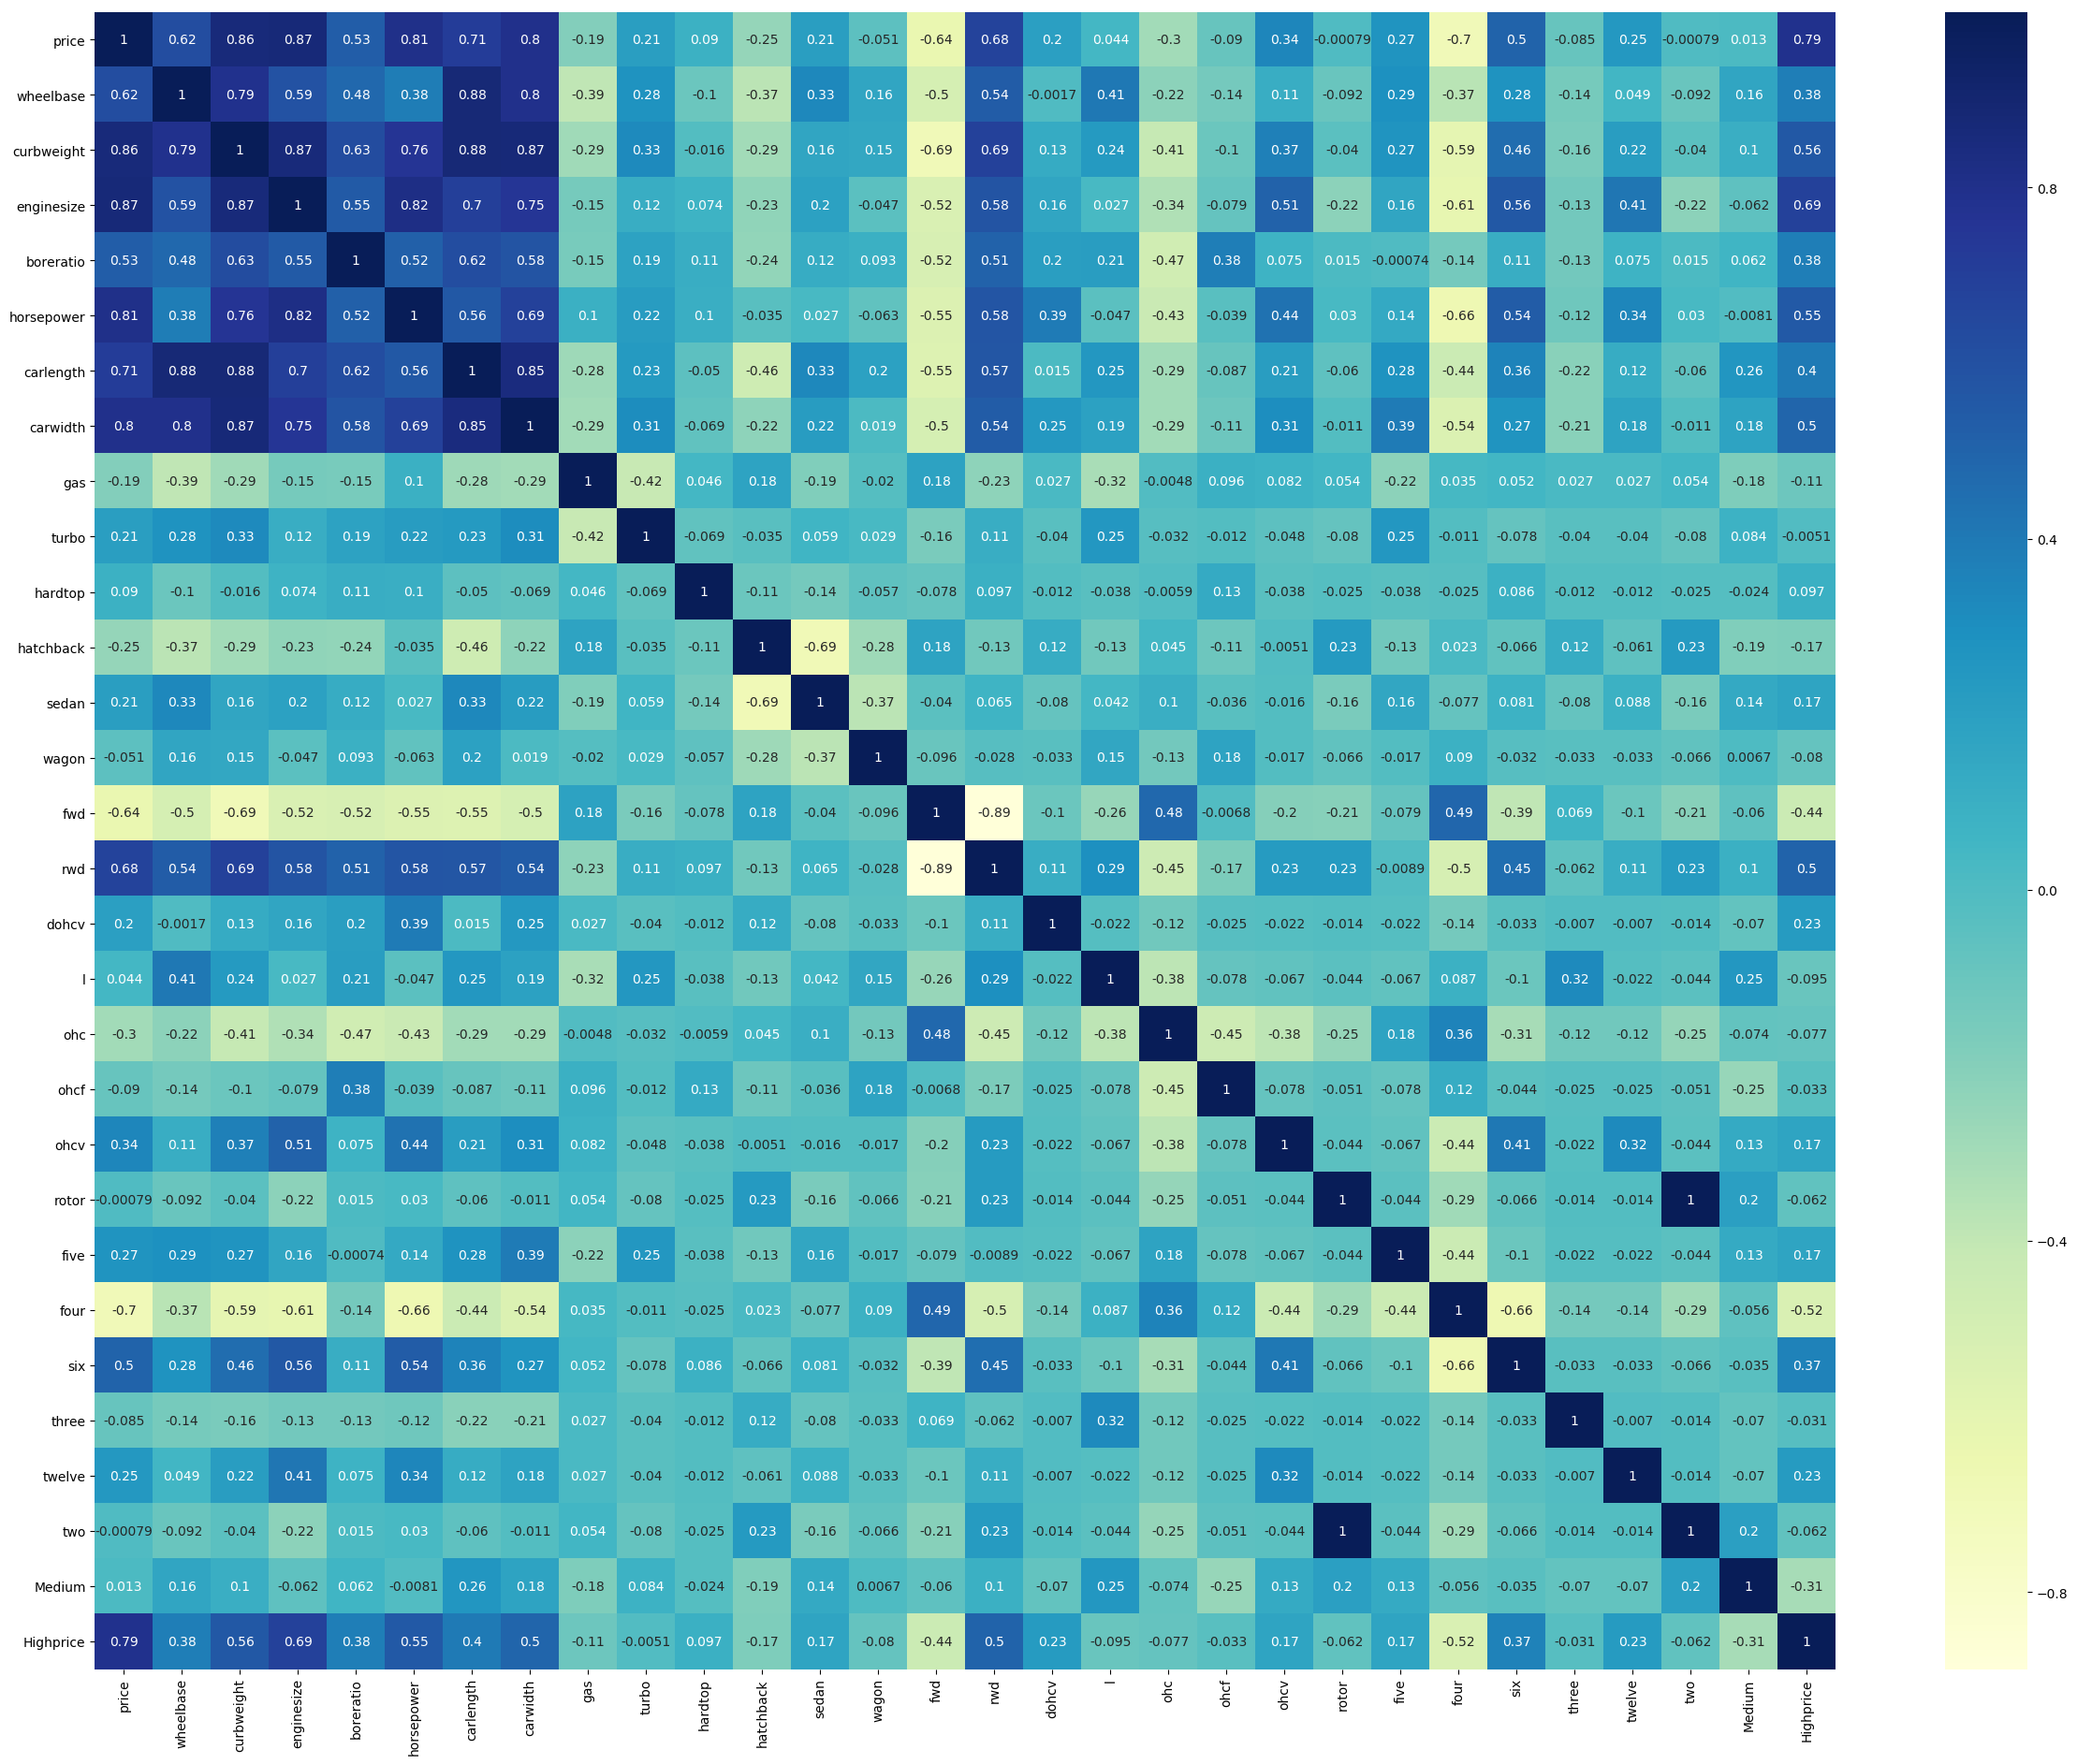

In [366]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30,23))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

curbweight, enginesize, horsepower,carwidth and highprice are strongly related with variable price 

### Dividing into X and Y sets for the model building

In [367]:
y_train = df_train.pop('price')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [368]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [369]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 11),
 ('horsepower', True, 1),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('gas', False, 4),
 ('turbo', False, 17),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 18),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 20),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 12),
 ('rotor', False, 19),
 ('five', False, 6),
 ('four', False, 5),
 ('six', False, 10),
 ('three', True, 1),
 ('twelve', False, 9),
 ('two', False, 16),
 ('Medium', False, 14),
 ('Highprice', True, 1)]

In [370]:
# name of variables which are supported by rfe
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'three', 'Highprice'],
      dtype='object')

In [371]:
# name of variables which are not supported by rfe
X_train.columns[~rfe.support_]

Index(['wheelbase', 'boreratio', 'carlength', 'gas', 'turbo', 'hardtop', 'fwd',
       'rwd', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'twelve', 'two', 'Medium'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [372]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)

In [373]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [374]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     173.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.63e-71
Time:                        23:32:31   Log-Likelihood:                 206.41
No. Observations:                 143   AIC:                            -390.8
Df Residuals:                     132   BIC:                            -358.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0312      0.026     -1.192      0.2

p-vale of enginesize seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [375]:
X_train_new = X_train_rfe.drop(["enginesize"], axis = 1)

model 2

In [376]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [377]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.22e-71
Time:                        23:32:31   Log-Likelihood:                 205.51
No. Observations:                 143   AIC:                            -391.0
Df Residuals:                     133   BIC:                            -361.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0360      0.026     -1.386      0.1

In [378]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,27.16
1,curbweight,8.13
5,sedan,6.08
4,hatchback,5.66
3,carwidth,5.27
2,horsepower,3.61
6,wagon,3.58
9,Highprice,1.64
7,dohcv,1.46
8,three,1.07


dropping variable curbweight as VIF is high for this variable

In [379]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

model 3

In [380]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     195.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           5.71e-70
Time:                        23:32:31   Log-Likelihood:                 198.48
No. Observations:                 143   AIC:                            -379.0
Df Residuals:                     134   BIC:                            -352.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0379      0.027     -1.395      0.1

In [381]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,27.15
4,sedan,6.06
3,hatchback,5.56
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.29
8,Highprice,1.57
6,dohcv,1.21
7,three,1.06


dropping variable sedan as VIF is 6.06

In [382]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

model 4

In [383]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.00e-69
Time:                        23:32:31   Log-Likelihood:                 193.80
No. Observations:                 143   AIC:                            -371.6
Df Residuals:                     135   BIC:                            -347.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1006      0.018     -5.591      0.0

In [384]:
checkVIF(X_train_new)

,Features,VIF
0,const,11.22
1,horsepower,2.39
2,carwidth,2.15
7,Highprice,1.57
3,hatchback,1.24
5,dohcv,1.21
4,wagon,1.11
6,three,1.06


now the p-value for wagon is more than 0.05 therefor dropping variable wagon


In [385]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

model 5

In [386]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     244.2
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.09e-70
Time:                        23:32:31   Log-Likelihood:                 193.25
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     136   BIC:                            -351.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1042      0.018     -5.903      0.0

In [387]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.80
1,horsepower,2.39
2,carwidth,2.15
6,Highprice,1.54
4,dohcv,1.21
3,hatchback,1.13
5,three,1.06


Text(0.5, 0, 'Errors')

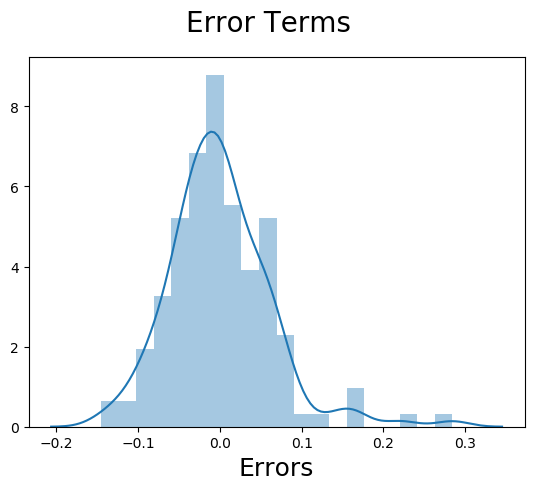

In [388]:
#perform the recedual analysis to check the model efficiency
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

model 6

In [389]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["dohcv"], axis = 1)
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     251.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.46e-67
Time:                        23:32:31   Log-Likelihood:                 182.87
No. Observations:                 143   AIC:                            -353.7
Df Residuals:                     137   BIC:                            -336.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0891      0.019     -4.796      0.0

,Features,VIF
0,const,10.42
1,horsepower,2.22
2,carwidth,2.15
5,Highprice,1.54
3,hatchback,1.11
4,three,1.06


now removing variable three as p-value is greater than 0.05

In [390]:
#Dropping dohcv to see the changes in model statistics
X_train_new = X_train_new.drop(["three"], axis = 1)


model 7

In [391]:
X_train_new = build_model(X_train_new,y_train)
checkVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        23:32:32   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highprice,1.53
3,hatchback,1.10


now p-values and VIF for all the variables included in model are not exceeding the limits thus proceeding for model analysis 

Step 9 : Residual Analysis of Model

Text(0.5, 0, 'Errors')

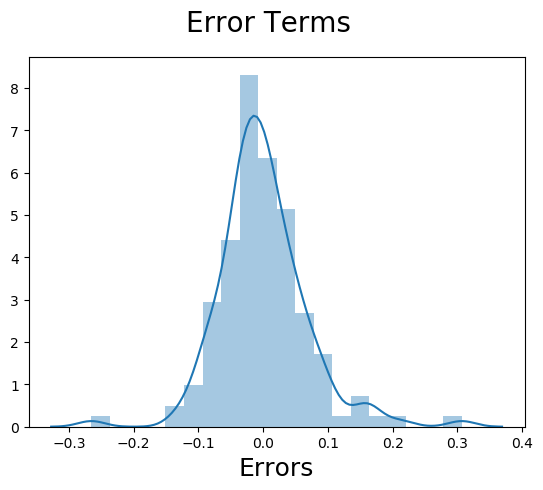

In [392]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Step 10 : Prediction and Evaluation

In [393]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [394]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [395]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [396]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [397]:
#calculating r2_score

r2_score(y_test, y_pred)


0.8614595209022033

Text(0, 0.5, 'y_pred')

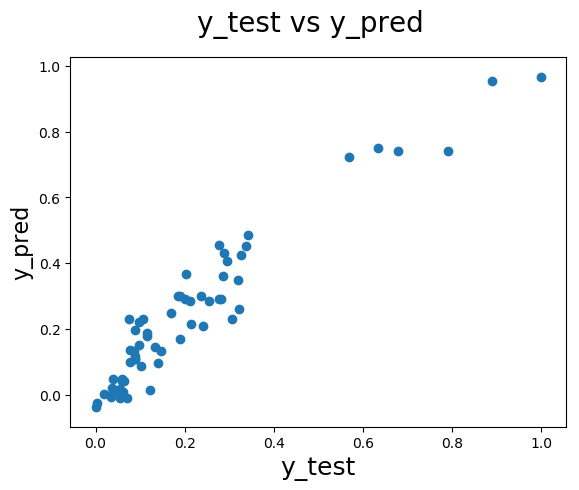

In [398]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [399]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.04e-67
Time:                        23:32:34   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0


We can see that the equation of our best fitted line is:

$ price = 0.440  \times  horsepower + 0.396  \times  carwidth - 0.041 \times hatchback + 0.0279 \times highprice  $
